In [3]:
import os
path = '/Users/yichingchan/Documents/FunNow_商業數據分析題目/retetion_log'
os.chdir(path)

In [607]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline
sns.set_style('white',{"font.sans-serif":['simhei', 'Arial']})
%config InlineBackend.figure_format = 'svg'

pd.set_option('display.max_columns', 500)
from datetime import datetime

#import warnings
#warnings.filterwarnings('ignore')

In [136]:
#2018年1到6月註冊帳號的使用者及他們註冊的時間
regist = pd.read_csv(path + '/registration_log.csv')
df_regist = regist.copy()

In [137]:
#2018年1到9月使用者打開 app 的時間紀錄
app = pd.read_csv(path + '/app_open_log.csv')
df_app = app.copy()

In [138]:
#2018年1到7月使用者的訂單資訊
purchase = pd.read_csv(path + '/purchase_log.csv')
df_purchase = purchase.copy()

In [139]:
#先convert date col to datetime dtype
df_regist['signup_time'] = pd.to_datetime(df_regist['signup_time'])
df_app['app_open_time'] = pd.to_datetime(df_app['app_open_time'])
df_purchase['purchase_time'] = pd.to_datetime(df_purchase['purchase_time'])

In [140]:
df_regist['month'] = df_regist['signup_time'].dt.month
df_regist['day'] = df_regist['signup_time'].dt.weekday + 1
df_regist['hour'] = df_regist['signup_time'].dt.hour

In [141]:
def change_time(df):
    
    def weekend(row):
        
        day = row['day']
        
        weekend = [6,7]
        if day in weekend:
            get = 'weekend'
        else:
            get = 'weekday'
        return get
            
    df['weekend'] = df.apply(weekend, axis=1)

    def time_of_day(row):
        
        hour = row['hour']
        midnight = [0,1,2,3,4,5,6]
        morning = [7,8,9,10,11]
        afternoon = [12,13,14,15,16,17]
        night = [18,19,20,21,22,23]

        if hour in midnight:
            time = 'midnight'
        elif hour in morning:
            time = 'morning'
        elif hour in afternoon:
            time = 'afternoon'
        elif hour in night:
            time = 'night'
        return time
    
    df['time_of_day'] = df.apply(time_of_day, axis=1)

    def season(row):
        spring = [3,4,5]
        summer = [6,7,8]
        fall = [9,10,11]
        winter = [12,1,2]
        
        month = row['month']

        if month in spring:
            season = 'spring'
        elif month in summer:
            season = 'summer'
        elif month in fall:
            season = 'fall'
        elif month in winter:
            season = 'winter'
            
        return season
    
    df['season'] = df.apply(season, axis=1)
        
    return df


In [142]:
df_regist = change_time(df_regist)
df_regist.head()

,user_id,signup_time,month,day,hour,weekend,time_of_day,season
0,c2e117bb5f8d9107525ad234b7195eba,2018-01-01 01:12:17,1,1,1,weekday,midnight,winter
1,8ff943305e147405b2f188a9ce52343d,2018-01-01 01:54:53,1,1,1,weekday,midnight,winter
2,a488b0d03a56cf7f45b93981209a5a42,2018-01-01 02:00:43,1,1,2,weekday,midnight,winter
3,450f15f6910c722cefd0b7aa17389181,2018-01-01 02:19:12,1,1,2,weekday,midnight,winter
4,d2e5f02028da9445537913c73cdc5f4c,2018-01-01 02:37:45,1,1,2,weekday,midnight,winter


In [143]:
df_app['month'] = df_app['app_open_time'].dt.month
df_app['day'] = df_app['app_open_time'].dt.weekday + 1
df_app['hour'] = df_app['app_open_time'].dt.hour
df_app = change_time(df_app)
df_app.head()

,user_id,app_open_time,month,day,hour,weekend,time_of_day,season
0,c2e117bb5f8d9107525ad234b7195eba,2018-01-01 01:12:18,1,1,1,weekday,midnight,winter
1,c2e117bb5f8d9107525ad234b7195eba,2018-01-01 01:12:18,1,1,1,weekday,midnight,winter
2,c2e117bb5f8d9107525ad234b7195eba,2018-01-01 01:12:19,1,1,1,weekday,midnight,winter
3,c2e117bb5f8d9107525ad234b7195eba,2018-01-01 01:12:31,1,1,1,weekday,midnight,winter
4,c2e117bb5f8d9107525ad234b7195eba,2018-01-01 01:12:34,1,1,1,weekday,midnight,winter


In [144]:
df_purchase['month'] = df_purchase['purchase_time'].dt.month
df_purchase['day'] = df_purchase['purchase_time'].dt.weekday + 1
df_purchase['hour'] = df_purchase['purchase_time'].dt.hour
df_purchase = change_time(df_purchase)
df_purchase.head()

,user_id,purchase_time,month,day,hour,weekend,time_of_day,season
0,3b2825eb1b54022b2b1b9172c00bcfda,2018-01-01 21:37:52,1,1,21,weekday,night,winter
1,1d6b38758ce29c175ebde724a5b8e0f9,2018-01-02 09:33:27,1,2,9,weekday,morning,winter
2,110a49fae39f8bf4ee9ee2d40ebc5600,2018-01-02 13:07:12,1,2,13,weekday,afternoon,winter
3,ec4d8996fcbaad62ec1370b5140e3bdb,2018-01-02 18:34:07,1,2,18,weekday,night,winter
4,2eb4ecb635ae8517ea29178c75aa2c0e,2018-01-02 20:10:03,1,2,20,weekday,night,winter


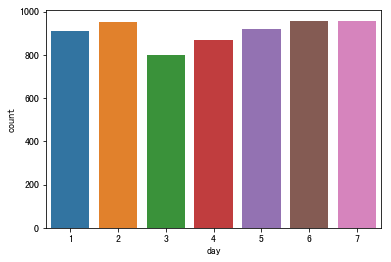

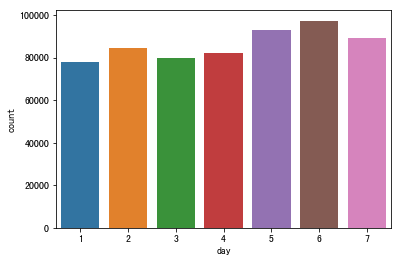

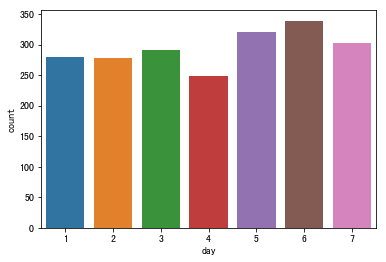

In [145]:
sns.countplot(data = df_regist, x = 'day')
plt.show()
sns.countplot(data = df_app, x = 'day')
plt.show()
sns.countplot(data = df_purchase, x = 'day')
plt.show()

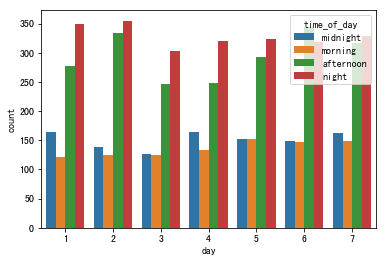

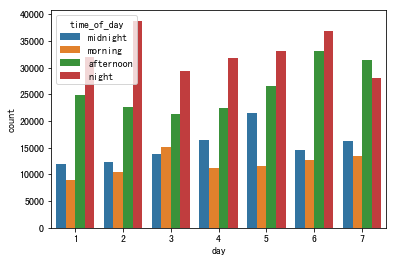

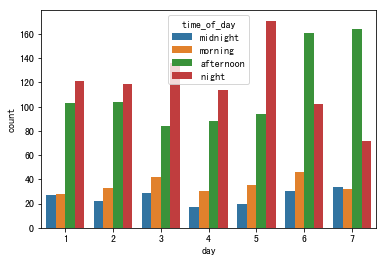

In [146]:
sns.countplot(data = df_regist, x = 'day', hue='time_of_day', hue_order = ['midnight', 'morning', 'afternoon', 'night'])
plt.show()
sns.countplot(data = df_app, x = 'day', hue='time_of_day', hue_order = ['midnight', 'morning', 'afternoon', 'night'])
plt.show()
sns.countplot(data = df_purchase, x = 'day', hue='time_of_day', hue_order = ['midnight', 'morning', 'afternoon', 'night'])
plt.show()

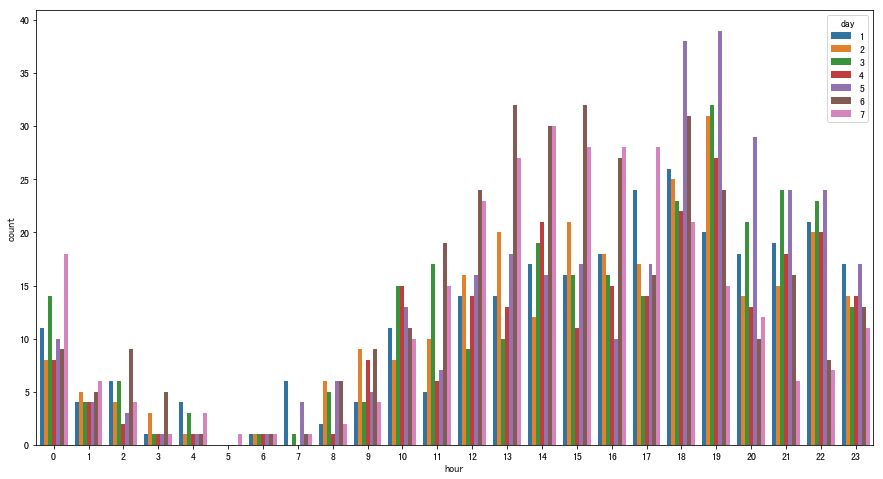

In [147]:
plt.figure(figsize=(15,8))
sns.countplot(data = df_purchase, x = 'hour', hue='day')
plt.ylabel('次數')
plt.xlabel('星期')
plt.legend(title="星期", bbox_to_anchor=(1, 1))
sns.despine(top=True, right=True, left=False, bottom=False, offset=None, trim=False)
plt.show()
#六日下午、五晚上的消費很多、六日凌晨有一點零星的突起

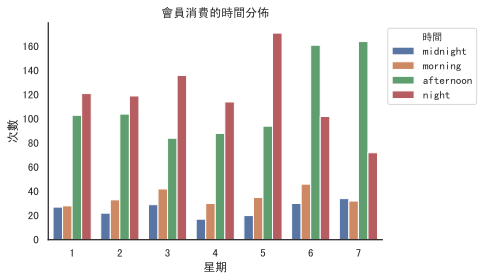

In [612]:
sns.countplot(data = df_purchase, x = 'day', hue='time_of_day', hue_order = ['midnight', 'morning', 'afternoon', 'night'])
plt.ylabel('次數')
plt.xlabel('星期')
plt.legend(title="時間", bbox_to_anchor=(1, 1))
plt.title('會員消費的時間分佈')
sns.despine(top=True, right=True, left=False, bottom=False, offset=None, trim=False)
plt.savefig('會員消費時間分佈.png', dpi=600)
plt.show()


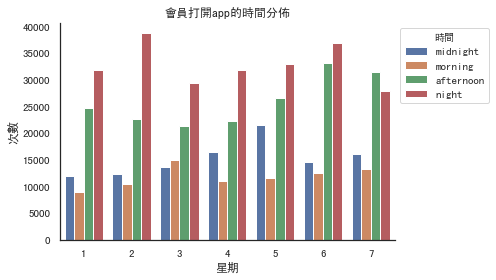

In [580]:
sns.countplot(data = df_app, x = 'day', hue='time_of_day', hue_order = ['midnight', 'morning', 'afternoon', 'night'])
plt.ylabel('次數')
plt.xlabel('星期')
plt.legend(title="時間", bbox_to_anchor=(1, 1))
plt.title('會員打開app的時間分佈')
sns.despine(top=True, right=True, left=False, bottom=False, offset=None, trim=False)
plt.show()
plt.show()

In [513]:
#同個會員消費次數
numPurchase = df_purchase.groupby('user_id').count()['purchase_time']
num = numPurchase.value_counts().to_frame().reset_index()
num.columns = ['nth purchase', 'count']
num = num.iloc[:5]
first = df_purchase.groupby('user_id')['purchase_time'].min().count()
second = df_purchase.groupby('user_id')['purchase_time'].nth(1).count()
third = df_purchase.groupby('user_id')['purchase_time'].nth(2).count()
forth = df_purchase.groupby('user_id')['purchase_time'].nth(3).count()
fifth = df_purchase.groupby('user_id')['purchase_time'].nth(4).count()

pct = [first/df_regist.shape[0], second/first, third/second, forth/third, fifth/forth]

In [514]:
num['pct'] = pct
num

,nth purchase,count,pct
0,1,561,0.145909
1,2,183,0.396125
2,3,60,0.502717
3,4,33,0.675676
4,5,17,0.736000


{'whiskers': [<matplotlib.lines.Line2D at 0x1a317f30b8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a317f36a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a317f3ef0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a33349cc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a33349b70>],
 'means': []}

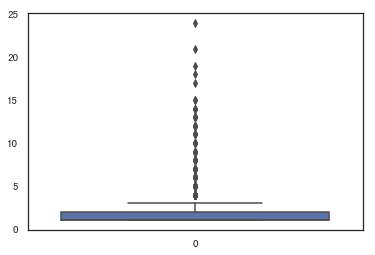

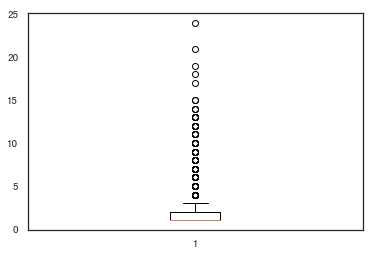

In [562]:
sns.boxplot(data=numPurchase)
fig1, ax1 = plt.subplots()
ax1.boxplot(numPurchase)

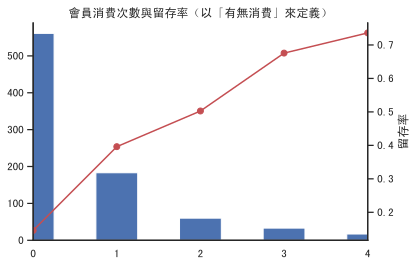

In [613]:
num['count'].plot(x='nth purchase',kind="bar")
ax = num['pct'].plot(secondary_y=True, color='r', marker='o')
ax.set_ylabel('留存率')
ax.set_xlabel('消費次數')
ax.set_title('會員消費次數與留存率（以「有無消費」來定義）')
sns.despine(top=True, right=False, left=False, bottom=False, offset=None, trim=False)
plt.savefig('消費次數與留存率.png',dpi = 600)
plt.show()

In [148]:
#cohort group based on when they sign up
df_regist['JoinPeriod'] = df_regist['signup_time'].apply(lambda x: x.strftime('%Y-%m'))
#加入消費次數的數據
df_regist = pd.merge(df_regist, numPurchase, on='user_id', how='outer')
df_regist = df_regist.rename(columns={'purchase_time': 'numPurchase'})

In [185]:
df_regist.head()

,user_id,signup_time,month,day,hour,weekend,time_of_day,season,JoinPeriod,numPurchase
0,c2e117bb5f8d9107525ad234b7195eba,2018-01-01 01:12:17,1,1,1,weekday,midnight,winter,2018-01,NaN
1,8ff943305e147405b2f188a9ce52343d,2018-01-01 01:54:53,1,1,1,weekday,midnight,winter,2018-01,NaN
2,a488b0d03a56cf7f45b93981209a5a42,2018-01-01 02:00:43,1,1,2,weekday,midnight,winter,2018-01,NaN
3,450f15f6910c722cefd0b7aa17389181,2018-01-01 02:19:12,1,1,2,weekday,midnight,winter,2018-01,NaN
4,d2e5f02028da9445537913c73cdc5f4c,2018-01-01 02:37:45,1,1,2,weekday,midnight,winter,2018-01,NaN


In [156]:
df_regist.groupby(['JoinPeriod','numPurchase']).count()['user_id']

JoinPeriod  numPurchase
2018-01     1.0             63
            2.0             18
            3.0             11
            4.0              4
            5.0              5
            6.0              3
            7.0              5
            8.0              2
            11.0             1
            12.0             1
            13.0             2
            14.0             1
            17.0             1
            21.0             1
            24.0             1
2018-02     1.0             85
            2.0             23
            3.0             11
            4.0              3
            5.0              2
            6.0              3
            7.0              2
            8.0              3
            9.0              1
            10.0             2
            11.0             2
            12.0             2
            14.0             1
            15.0             1
2018-03     1.0            100
                          ... 
2018-04     2.0

In [189]:
df_app['AppOpenPeriod'] = df_app['app_open_time'].apply(lambda x: x.strftime('%Y-%m'))
df_app.head()
#merge AppOpen and SignUp tables (full join)
df_merge = pd.merge(df_app[['user_id', 'AppOpenPeriod']], df_regist[['user_id', 'JoinPeriod']], on = 'user_id', how = 'outer')
df_merge.head()

,user_id,AppOpenPeriod,JoinPeriod
0,c2e117bb5f8d9107525ad234b7195eba,2018-01,2018-01
1,c2e117bb5f8d9107525ad234b7195eba,2018-01,2018-01
2,c2e117bb5f8d9107525ad234b7195eba,2018-01,2018-01
3,c2e117bb5f8d9107525ad234b7195eba,2018-01,2018-01
4,c2e117bb5f8d9107525ad234b7195eba,2018-01,2018-01


In [210]:
count = df_merge.groupby(['user_id','AppOpenPeriod']).agg({'AppOpenPeriod': pd.Series.nunique})
count = count.unstack()

In [208]:
absence = pd.merge(count, df_merge[['user_id', 'JoinPeriod']], on='user_id', how='outer')
absence.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:522: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,user_id,"(AppOpenPeriod, 2018-01)","(AppOpenPeriod, 2018-02)","(AppOpenPeriod, 2018-03)","(AppOpenPeriod, 2018-04)","(AppOpenPeriod, 2018-05)","(AppOpenPeriod, 2018-06)","(AppOpenPeriod, 2018-07)","(AppOpenPeriod, 2018-08)","(AppOpenPeriod, 2018-09)",JoinPeriod
0,001018482b2c36cd75e60bb7d08bc949,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,2018-05
1,001018482b2c36cd75e60bb7d08bc949,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,2018-05
2,001018482b2c36cd75e60bb7d08bc949,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,2018-05
3,001018482b2c36cd75e60bb7d08bc949,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,2018-05
4,001018482b2c36cd75e60bb7d08bc949,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,2018-05


In [ ]:
def constant(row):
    join = row['JoinPeriod']
    

In [ ]:
有註冊>有開啟app>有消費（以月為單位）消費漏斗

In [160]:
df_purchase['PurchasePeriod'] = df_purchase['purchase_time'].apply(lambda x: x.strftime('%Y-%m'))
df_purchase.head()

,user_id,purchase_time,month,day,hour,weekend,time_of_day,season,PurchasePeriod
0,3b2825eb1b54022b2b1b9172c00bcfda,2018-01-01 21:37:52,1,1,21,weekday,night,winter,2018-01
1,1d6b38758ce29c175ebde724a5b8e0f9,2018-01-02 09:33:27,1,2,9,weekday,morning,winter,2018-01
2,110a49fae39f8bf4ee9ee2d40ebc5600,2018-01-02 13:07:12,1,2,13,weekday,afternoon,winter,2018-01
3,ec4d8996fcbaad62ec1370b5140e3bdb,2018-01-02 18:34:07,1,2,18,weekday,night,winter,2018-01
4,2eb4ecb635ae8517ea29178c75aa2c0e,2018-01-02 20:10:03,1,2,20,weekday,night,winter,2018-01


In [163]:
#merge AppOpen and SignUp tables (full join)
joinPurchase = pd.merge(df_purchase[['user_id', 'PurchasePeriod']], df_regist[['user_id', 'JoinPeriod']], on = 'user_id', how = 'outer')
joinPurchase.head()

,user_id,PurchasePeriod,JoinPeriod
0,3b2825eb1b54022b2b1b9172c00bcfda,2018-01,2018-01
1,1d6b38758ce29c175ebde724a5b8e0f9,2018-01,2018-01
2,110a49fae39f8bf4ee9ee2d40ebc5600,2018-01,2018-01
3,ec4d8996fcbaad62ec1370b5140e3bdb,2018-01,2018-01
4,2eb4ecb635ae8517ea29178c75aa2c0e,2018-01,2018-01


In [164]:
joinPurchase.isnull().values.any()

True

In [166]:
#count the unique users per group and period
cohorts = joinPurchase.groupby(['JoinPeriod', 'PurchasePeriod']).agg({'user_id': pd.Series.nunique}) #沒打開app從這一步開始就不會被計入
cohorts.rename(columns={'user_id': 'TotalUsers'}, inplace=True)
cohorts.head()

TotalUsers
JoinPeriod PurchasePeriod            
2018-01    2018-01                 85
           2018-02                 40
           2018-03                 25
           2018-04                 21
           2018-05                 22

In [167]:
#get cohort period so that we can compare among groups
def cohort_period(df):
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

TotalUsers  CohortPeriod
JoinPeriod PurchasePeriod                          
2018-01    2018-01                 85             1
           2018-02                 40             2
           2018-03                 25             3
           2018-04                 21             4
           2018-05                 22             5

In [168]:
# reindex the DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['JoinPeriod', 'CohortPeriod'], inplace=True)

In [169]:
# create a Series holding the total size of each CohortGroup
cohort_group_size = df_regist.groupby('JoinPeriod').count()['user_id']#每月新註冊人數
cohort_group_size

JoinPeriod
2018-01     724
2018-02     888
2018-03    1359
2018-04    1270
2018-05    1135
2018-06     991
Name: user_id, dtype: int64

In [170]:
#get absolute numbers 
user_retention = cohorts['TotalUsers'].unstack(0)
user_retention

JoinPeriod,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06
CohortPeriod,,,,,,
1,85.0,99.0,130.0,136.0,147.0,120.0
2,40.0,32.0,46.0,49.0,49.0,44.0
3,25.0,26.0,42.0,41.0,46.0,NaN
4,21.0,25.0,27.0,36.0,NaN,NaN
5,22.0,30.0,35.0,NaN,NaN,NaN
6,20.0,24.0,NaN,NaN,NaN,NaN
7,17.0,NaN,NaN,NaN,NaN,NaN


In [171]:
#get retention RATE
user_retention = user_retention.divide(cohort_group_size, axis=1).T
user_retention

CohortPeriod,1,2,3,4,5,6,7
JoinPeriod,,,,,,,
2018-01,0.117403,0.055249,0.034530,0.029006,0.030387,0.027624,0.023481
2018-02,0.111486,0.036036,0.029279,0.028153,0.033784,0.027027,NaN
2018-03,0.095659,0.033848,0.030905,0.019868,0.025754,NaN,NaN
2018-04,0.107087,0.038583,0.032283,0.028346,NaN,NaN,NaN
2018-05,0.129515,0.043172,0.040529,NaN,NaN,NaN,NaN
2018-06,0.121090,0.044400,NaN,NaN,NaN,NaN,NaN


In [172]:
#加入每月新註冊人數
user_retention.insert(0,'New Users', cohort_group_size)
user_retention

CohortPeriod,New Users,1,2,3,4,5,6,7
JoinPeriod,,,,,,,,
2018-01,724,0.117403,0.055249,0.034530,0.029006,0.030387,0.027624,0.023481
2018-02,888,0.111486,0.036036,0.029279,0.028153,0.033784,0.027027,NaN
2018-03,1359,0.095659,0.033848,0.030905,0.019868,0.025754,NaN,NaN
2018-04,1270,0.107087,0.038583,0.032283,0.028346,NaN,NaN,NaN
2018-05,1135,0.129515,0.043172,0.040529,NaN,NaN,NaN,NaN
2018-06,991,0.121090,0.044400,NaN,NaN,NaN,NaN,NaN


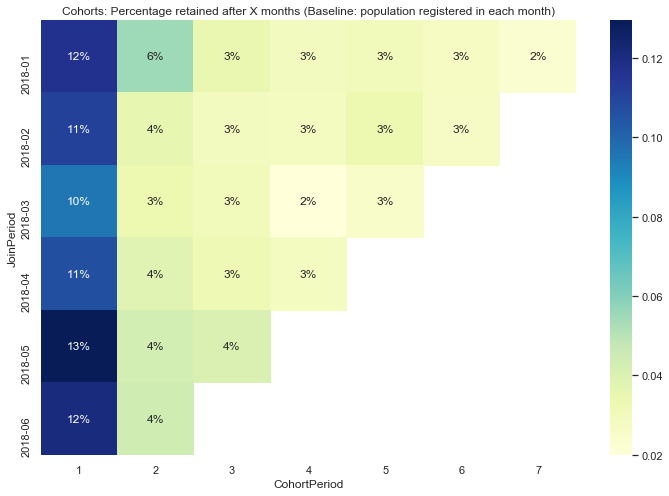

In [173]:
#cohort: 按照註冊時間。留存定義：當月有沒有消費過
sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: Percentage retained after X months (Baseline: population registered in each month)')
sns.heatmap(user_retention.iloc[:,1:], mask=user_retention.iloc[:,1:].isnull(), annot=True, fmt='.0%', cmap="YlGnBu", );

In [174]:
##依照「註冊後第一個月內有無消費」分成兩群人
#找出每個user最早一次消費時間
first_purchase = pd.DataFrame(df_purchase.groupby('user_id')['purchase_time'].min().reset_index())
#合併註冊table和首購table
regi_buy = pd.merge(df_regist, first_purchase, on=['user_id'], how='left')
regi_buy.head()
#計算首購和註冊日期之差
regi_buy['time_diff'] = (regi_buy['purchase_time'] - regi_buy['signup_time'])/np.timedelta64(1, 'M')
regi_buy['time_diff'] = regi_buy['time_diff'].astype(float)
#標記「註冊後一個月內有消費」的為True，其餘為False（超過一個月才消費＋never消費的）
regi_buy.loc[regi_buy.time_diff <= 1 , 'BuyWithinOneMonth'] = True
regi_buy.loc[regi_buy.time_diff > 1 , 'BuyWithinOneMonth'] = False
regi_buy.loc[regi_buy.time_diff.isnull() , 'BuyWithinOneMonth'] = False
#分兩群人
buyWithin = regi_buy[regi_buy['BuyWithinOneMonth'] == True]
NoWithin = regi_buy[regi_buy['BuyWithinOneMonth'] == False]

In [400]:
def get_retention_rate_purchase(df_purchase, df_registration):
    #merge AppOpen and SignUp tables (full join)
    df_merge = pd.merge(df_purchase[['user_id', 'PurchasePeriod']], df_registration[['user_id', 'JoinPeriod']], on = 'user_id', how = 'outer')
    #print('anyone sign up but never purchase?:', df_merge.isnull().values.any()) #因為有人有註冊但沒open app
    #print()
    
    #count the unique users per group and period
    cohorts = df_merge.groupby(['JoinPeriod', 'PurchasePeriod']).agg({'user_id': pd.Series.nunique}) #沒打開app從這一步開始就不會被計入
    cohorts.rename(columns={'user_id': 'TotalUsers'}, inplace=True)
    
    #get cohort period so that we can compare among groups
    def cohort_period(df):
        df['CohortPeriod'] = np.arange(len(df)) + 1
        return df
    
    cohorts = cohorts.groupby(level=0).apply(cohort_period)
    
    # reindex the DataFrame
    cohorts.reset_index(inplace=True)
    cohorts.set_index(['JoinPeriod', 'CohortPeriod'], inplace=True)
    
    # create a Series holding the total size of each CohortGroup
    cohort_group_size = df_registration.groupby('JoinPeriod').count()['user_id']#每月新註冊人數
    
    #get retention number
    user_retention = cohorts['TotalUsers'].unstack(0)
    
    #check equivalence
    #num_join = user_retention.loc[1]
    #num_check = pd.concat([num_join.astype(int), cohort_group_size], axis=1)
    #num_check.columns = ['numOpenApp', 'numJoin']
    #num_check['equivalent'] = num_check['numJoin'] == num_check['numOpenApp']
    #print(num_check)
    
    #get retention rate
    user_retention = user_retention.divide(cohort_group_size, axis=1).T
    
    #加入每月新註冊人數
    user_retention.insert(0,'New Users', cohort_group_size)
    
    return user_retention

In [401]:
def get_retention_rate_openapp(df_app, df_registration):
    #merge AppOpen and SignUp tables (full join)
    df_merge = pd.merge(df_app[['user_id', 'AppOpenPeriod']], df_registration[['user_id', 'JoinPeriod']], on = 'user_id', how = 'outer')
    #print('anyone sign up but never openapp?:', df_merge.isnull().values.any()) #因為有人有註冊但沒open app
    #print()
    
    #count the unique users per group and period
    cohorts = df_merge.groupby(['JoinPeriod', 'AppOpenPeriod']).agg({'user_id': pd.Series.nunique}) #沒打開app從這一步開始就不會被計入
    cohorts.rename(columns={'user_id': 'TotalUsers'}, inplace=True)
    
    #get cohort period so that we can compare among groups
    def cohort_period(df):
        df['CohortPeriod'] = np.arange(len(df)) + 1
        return df
    
    cohorts = cohorts.groupby(level=0).apply(cohort_period)
    
    # reindex the DataFrame
    cohorts.reset_index(inplace=True)
    cohorts.set_index(['JoinPeriod', 'CohortPeriod'], inplace=True)
    
    # create a Series holding the total size of each CohortGroup
    cohort_group_size = df_registration.groupby('JoinPeriod').count()['user_id']#每月新註冊人數
    
    #get retention number
    user_retention = cohorts['TotalUsers'].unstack(0)
    
    #check equivalence
    #num_join = user_retention.loc[1]
    #num_check = pd.concat([num_join.astype(int), cohort_group_size], axis=1)
    #num_check.columns = ['numOpenApp', 'numJoin']
    #num_check['equivalent'] = num_check['numJoin'] == num_check['numOpenApp']
    #print(num_check)
    
    #get retention rate
    user_retention = user_retention.divide(cohort_group_size, axis=1).T
    
    #加入每月新註冊人數
    user_retention.insert(0,'New Users', cohort_group_size)
    
    return user_retention

In [181]:
buyWithin_retention = get_retention_rate_purchase(df_purchase,buyWithin)
buyWithin_retention

anyone sign up but never purchase?: True



CohortPeriod,New Users,1,2,3,4,5,6,7
JoinPeriod,,,,,,,,
2018-01,102,0.833333,0.343137,0.186275,0.137255,0.156863,0.147059,0.117647
2018-02,113,0.876106,0.212389,0.176991,0.159292,0.203540,0.141593,NaN
2018-03,140,0.928571,0.285714,0.221429,0.128571,0.185714,NaN,NaN
2018-04,157,0.866242,0.267516,0.184713,0.171975,NaN,NaN,NaN
2018-05,164,0.896341,0.280488,0.195122,NaN,NaN,NaN,NaN
2018-06,130,0.923077,0.307692,NaN,NaN,NaN,NaN,NaN


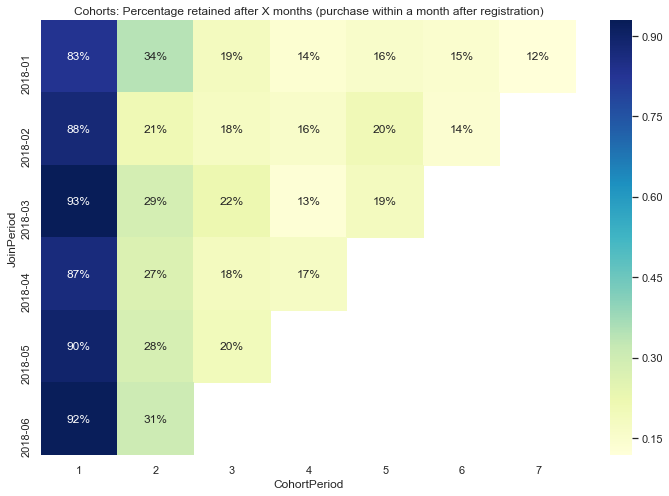

In [182]:
sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: Percentage retained after X months (purchase within a month after registration)')
sns.heatmap(buyWithin_retention.iloc[:,1:], mask=buyWithin_retention.iloc[:,1:].isnull(), annot=True, fmt='.0%', cmap="YlGnBu", );

In [183]:
noWithin_retention = get_retention_rate_purchase(df_purchase,NoWithin)
noWithin_retention

anyone sign up but never purchase?: True



CohortPeriod,New Users,1,2,3,4,5,6
JoinPeriod,,,,,,,
2018-01,622,0.008039,0.009646,0.011254,0.009646,0.008039,0.008039
2018-02,775,0.010323,0.007742,0.009032,0.009032,0.010323,NaN
2018-03,1219,0.004922,0.009024,0.007383,0.007383,NaN,NaN
2018-04,1113,0.006289,0.010782,0.008086,NaN,NaN,NaN
2018-05,971,0.003090,0.014418,NaN,NaN,NaN,NaN
2018-06,861,0.004646,NaN,NaN,NaN,NaN,NaN


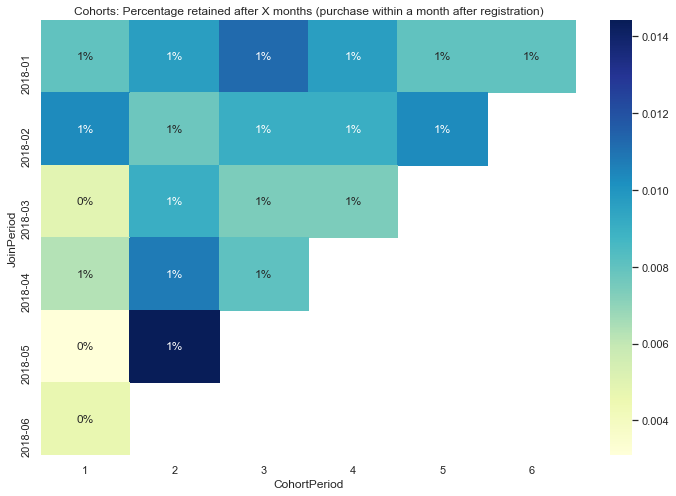

In [184]:
sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: Percentage retained after X months (purchase within a month after registration)')
sns.heatmap(noWithin_retention.iloc[:,1:], mask=noWithin_retention.iloc[:,1:].isnull(), annot=True, fmt='.0%', cmap="YlGnBu", );

In [236]:
NOW = dt.datetime(2018,8,1)
rfmtable = df_purchase.groupby('user_id').agg({'purchase_time':lambda x:(NOW-x.max()).days, 'user_id': lambda x:len(x)})
rfmtable.rename(columns = {'purchase_time':'recency', 'user_id':'frequency'}, inplace = True)
rfmtable.head()

,recency,frequency
user_id,,
001018482b2c36cd75e60bb7d08bc949,6,7
002fbdcec9b9a95ee1295e2e9b59deaf,66,1
00fb88b10c1af253315c8786941e46fd,126,1
01e26586f62dedcf1bbf7bf8cb3550cb,89,2
033d450c0cb61495af58a6de89910516,44,1


In [237]:
quantiles = rfmtable.quantile(q=[0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1 
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1
seg_rfmtable = rfmtable
seg_rfmtable['r_quartile'] = seg_rfmtable['recency'].apply(RScore, args = ('recency', quantiles,))
seg_rfmtable['f_quartile'] = seg_rfmtable['frequency'].apply(FMScore, args = ('frequency', quantiles,))
seg_rfmtable.reset_index(level = 0, inplace = True)

In [238]:
quantiles

{'recency': {0.25: 35.0, 0.5: 73.0, 0.75: 123.0},
 'frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 2.0}}

In [246]:
temp = pd.merge(seg_rfmtable, regi_buy[['user_id','BuyWithinOneMonth']], on='user_id', how='left')

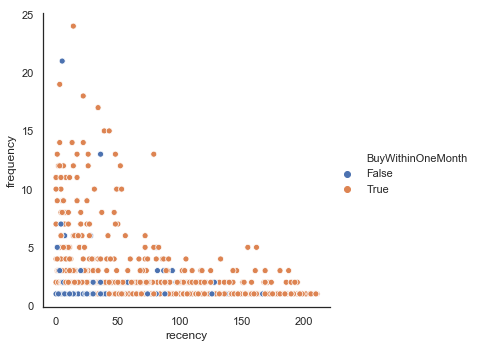

In [248]:
sns.relplot(data=temp, x='recency', y='frequency', hue='BuyWithinOneMonth')

In [320]:
##依照「第n次消費在第days天內完成」分成兩群人
def nth_within(df, n, days):
    #找出每個user最n次消費時間
    nth_purchase = pd.DataFrame(df_purchase.groupby('user_id')['purchase_time'].nth(n).reset_index())
    #合併註冊table和首購table
    nth_purchase = pd.merge(df_regist, nth_purchase , on=['user_id'], how='left')
    nth_purchase.head()
    #計算首購和註冊日期之差
    nth_purchase['time_diff'] = (nth_purchase['purchase_time'] - nth_purchase['signup_time'])/np.timedelta64(days, 'D')
    nth_purchase['time_diff'] = nth_purchase['time_diff'].astype(float)
    #標記「註冊後一個月內有消費」的為True，其餘為False（超過一個月才消費＋never消費的）
    nth_purchase.loc[nth_purchase.time_diff <= 1 , 'BuyWithin'] = True
    nth_purchase.loc[nth_purchase.time_diff > 1 , 'BuyWithin'] = False
    nth_purchase.loc[nth_purchase.time_diff.isnull() , 'BuyWithin'] = False
    return nth_purchase

1.0     472
2.0     165
3.0      54
4.0      32
5.0      15
6.0      13
7.0      12
8.0       8
9.0       7
13.0      6
12.0      6
11.0      5
10.0      5
14.0      3
15.0      2
19.0      1
17.0      1
24.0      1
18.0      1
Name: numPurchase, dtype: int64


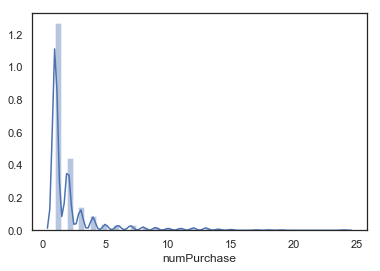

1.0     89
2.0     18
3.0      6
6.0      2
5.0      2
7.0      1
4.0      1
21.0     1
Name: numPurchase, dtype: int64


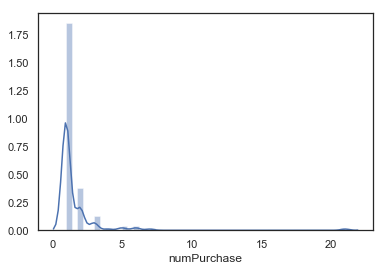

In [438]:
k = nth_within(df_purchase, 0, 31)
print(k[k['BuyWithin']==True]['numPurchase'].value_counts())
sns.distplot(k[k['BuyWithin']==True]['numPurchase'])
plt.show()
print(k[(k['BuyWithin']==False) & (k['numPurchase'].notnull())]['numPurchase'].value_counts())
sns.distplot(k[(k['BuyWithin']==False) & (k['numPurchase'].notnull())]['numPurchase'])
plt.show()

In [363]:
def rfm(n,days):
    nth = nth_within(df_purchase, n, days)
    temp = pd.merge(seg_rfmtable, nth[['user_id','BuyWithin']], on='user_id', how='left')
    sns.relplot(data=temp, x='recency', y='frequency', hue='BuyWithin')
    plt.show()

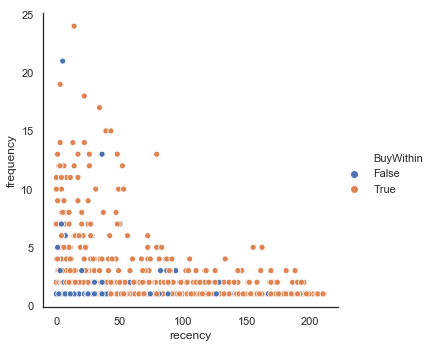

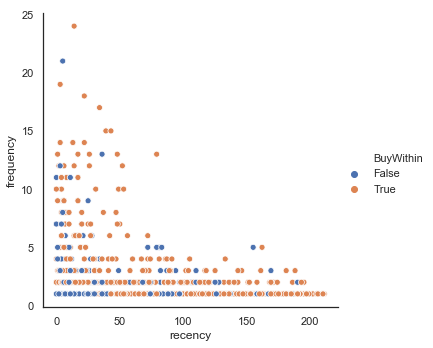

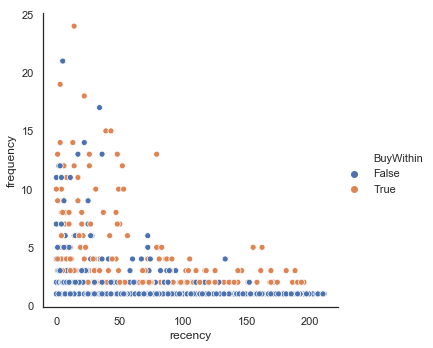

In [445]:
rfm(0,30)
plt.show()
rfm(0,7)
plt.show()
rfm(1,30)
plt.show()

In [397]:
def get_mean(n, days):
    nth = nth_within(df_purchase, n, days)
    temp = pd.merge(seg_rfmtable, nth[['user_id','BuyWithin']], on='user_id', how='left')
    #sns.relplot(data=temp, x='recency', y='frequency', hue='BuyWithin')
    #plt.show()
    #分兩群人
    buyWithin = nth[nth['BuyWithin'] == True]
    NoWithin = nth[nth['BuyWithin'] == False]
    
    within_purchase = get_retention_rate_purchase(df_purchase, buyWithin)
    without_purchase = get_retention_rate_purchase(df_purchase, NoWithin)
    within_open = get_retention_rate_openapp(df_app, buyWithin)
    without_open = get_retention_rate_openapp(df_app, NoWithin)
    return within_purchase.median(), without_purchase.median(), within_open.median(), without_open.median()

              註冊後1個月內至少消費1次  註冊後1個月內至少消費2次  註冊後1周內至少消費1次
CohortPeriod                                            
New Users        135.000000      35.500000    115.500000
1                  0.888973       0.883117      0.974086
2                  0.280894       0.561869      0.225468
3                  0.186275       0.370370      0.185185
4                  0.148273       0.274436      0.141516
5                  0.185714       0.263158      0.172131
6                  0.144326       0.309524      0.132585
7                  0.117647       0.222222      0.123457


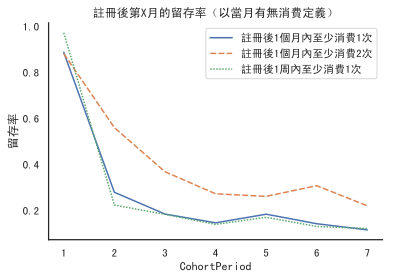

In [614]:
#purcase - retention rate
compare_within = pd.DataFrame()
compare_within['註冊後1個月內至少消費1次'] = get_mean(0, 30)[0]
compare_within['註冊後1個月內至少消費2次'] = get_mean(1, 30)[0]
compare_within['註冊後1周內至少消費1次'] = get_mean(0, 7)[0]
print(compare_within)
sns.lineplot(data=compare_within.iloc[1:8, ])
plt.title('註冊後第X月的留存率（以當月有無消費定義）')
plt.ylabel('留存率')
sns.despine(top=True, right=True, left=False, bottom=False, offset=None, trim=False)
plt.savefig('消費留存趨勢圖.png',dpi = 600)

              1st-30days  2st-30days   1st-7days
CohortPeriod                                    
New Users     135.000000   35.500000  115.500000
1               1.000000    1.000000    1.000000
2               0.752839    0.862782    0.709048
3               0.585676    0.732684    0.550800
4               0.540680    0.696172    0.500262
5               0.484663    0.636364    0.450000
6               0.418679    0.631978    0.406246
7               0.407143    0.571429    0.393443
8               0.386344    0.552910    0.387313
9               0.372549    0.444444    0.320988


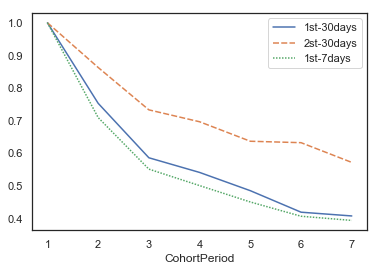

In [403]:
#open app - retention rate
compare_within = pd.DataFrame()
compare_within['1st-30days'] = get_mean(0, 30)[2]
compare_within['2st-30days'] = get_mean(1, 30)[2]
compare_within['1st-7days'] = get_mean(0, 7)[2]
print(compare_within)
sns.lineplot(data=compare_within.iloc[1:8, ])

              註冊後1個月內至少消費1次  註冊後1個月內至少消費2次  註冊後1周內內至少消費1次
CohortPeriod                                             
1                  0.888973       0.883117       0.974086
2                  0.373113       0.651229       0.317987
3                  0.318051       0.505498       0.336211
4                  0.274235       0.394207       0.282883
5                  0.383183       0.413534       0.382514
6                  0.344717       0.489770       0.326366
7                  0.288958       0.388889       0.313786
8                       NaN            NaN            NaN
9                       NaN            NaN            NaN
New Users          1.000000       1.000000       1.000000


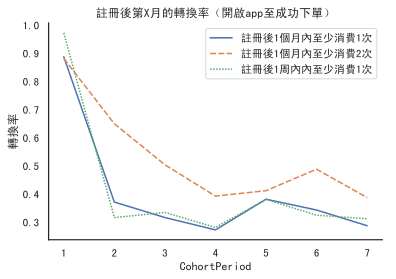

In [615]:
#conversion rate: openapp -> purchase
compare_no = pd.DataFrame()
compare_no['註冊後1個月內至少消費1次'] = get_mean(0, 30)[0]/get_mean(0, 30)[2]
compare_no['註冊後1個月內至少消費2次'] = get_mean(1, 30)[0]/get_mean(1, 30)[2]
compare_no['註冊後1周內內至少消費1次'] = get_mean(0, 7)[0]/get_mean(0, 7)[2]
print(compare_no)
sns.lineplot(data=compare_no.iloc[0:8, ])
plt.title('註冊後第X月的轉換率（開啟app至成功下單）')
plt.ylabel('轉換率')
sns.despine(top=True, right=True, left=False, bottom=False, offset=None, trim=False)
plt.savefig('轉換率趨勢圖.png',dpi = 600)

              註冊後30天內有消費  註冊後30天內無消費
CohortPeriod                        
1               0.888973    0.006152
2               0.373113    0.028227
3               0.318051    0.038565
4               0.274235    0.050068
5               0.383183    0.062872
6               0.344717    0.059694
7               0.288958         NaN
8                    NaN         NaN
9                    NaN         NaN
New Users       1.000000    1.000000


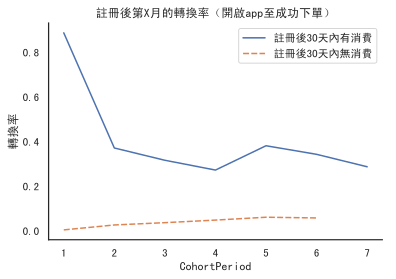

In [616]:
compare_no = pd.DataFrame()
compare_no['註冊後30天內有消費'] = get_mean(0, 30)[0]/get_mean(0, 30)[2]
compare_no['註冊後30天內無消費'] = get_mean(0, 30)[1]/get_mean(0, 30)[3]
print(compare_no)
sns.lineplot(data=compare_no.iloc[0:8, ])
plt.title('註冊後第X月的轉換率（開啟app至成功下單）')
plt.ylabel('轉換率')
sns.despine(top=True, right=True, left=False, bottom=False, offset=None, trim=False)
plt.savefig('轉換率趨勢圖簡易.png',dpi = 600)

anyone sign up but never purchase?: True

anyone sign up but never purchase?: True

anyone sign up but never purchase?: True

anyone sign up but never purchase?: True

anyone sign up but never purchase?: True

anyone sign up but never purchase?: True

              1st-30days   2st-30days   1st-7days
CohortPeriod                                     
New Users     916.500000  1020.000000  938.500000
1               0.006052     0.088733    0.010481
2               0.009646     0.023110    0.021469
3               0.009004     0.021521    0.015552
4               0.009032     0.019340    0.012870
5               0.009181     0.021521    0.015113
6               0.008039     0.018272    0.014407


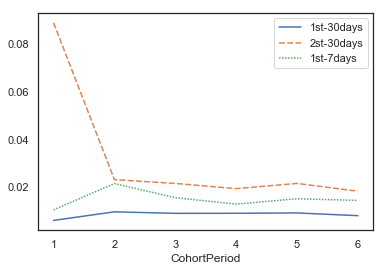

In [382]:
compare_no = pd.DataFrame()
compare_no['1st-30days'] = get_mean(0, 30)[1]
compare_no['2st-30days'] = get_mean(1, 30)[1]
compare_no['1st-7days'] = get_mean(0, 7)[1]
print(compare_no)
sns.lineplot(data=compare_no.iloc[1:8, ])

              1st-30days   2st-30days   1st-7days
CohortPeriod                                     
New Users     916.500000  1020.000000  938.500000
1               0.983639     0.985291    0.984023
2               0.341738     0.374479    0.354347
3               0.233489     0.265883    0.249770
4               0.180399     0.210604    0.192153
5               0.146021     0.179410    0.157789
6               0.134664     0.157128    0.140465
7               0.130225     0.150646    0.142317
8               0.102732     0.127282    0.110735
9               0.099678     0.126255    0.115086


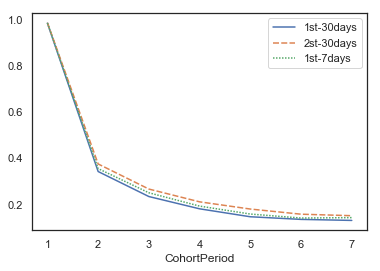

In [408]:
#open app - retention rate
compare_within = pd.DataFrame()
compare_within['1st-30days'] = get_mean(0, 30)[3]
compare_within['2st-30days'] = get_mean(1, 30)[3]
compare_within['1st-7days'] = get_mean(0, 7)[3]
print(compare_within)
sns.lineplot(data=compare_within.iloc[1:8, ])

              1st-30days  2st-30days  1st-7days
CohortPeriod                                   
1               0.006152    0.090058   0.010651
2               0.028227    0.061712   0.060587
3               0.038565    0.080941   0.062266
4               0.050068    0.091830   0.066980
5               0.062872    0.119954   0.095782
6               0.059694    0.116285   0.102568
7                    NaN    0.104762   0.076494
8                    NaN         NaN        NaN
9                    NaN         NaN        NaN
New Users       1.000000    1.000000   1.000000


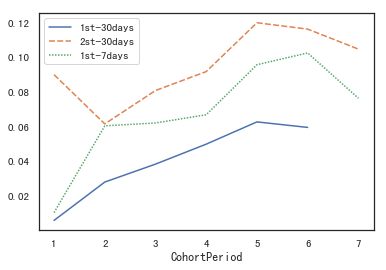

In [537]:
#conversion rate: openapp -> purchase
compare_no = pd.DataFrame()
compare_no['1st-30days'] = get_mean(0, 30)[1]/get_mean(0, 30)[3]
compare_no['2st-30days'] = get_mean(1, 30)[1]/get_mean(1, 30)[3]
compare_no['1st-7days'] = get_mean(0, 7)[1]/get_mean(0, 7)[3]
print(compare_no)
sns.lineplot(data=compare_no.iloc[0:8, ])

anyone sign up but never purchase?: True



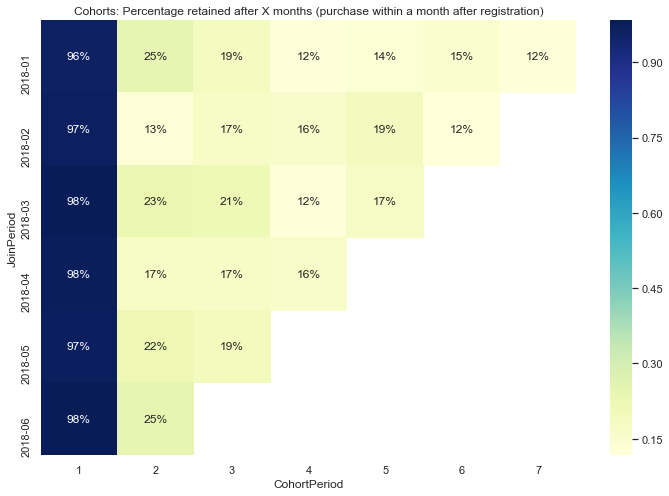

In [322]:

sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: Percentage retained after X months (purchase within a month after registration)')
sns.heatmap(within.iloc[:,1:], mask=within.iloc[:,1:].isnull(), annot=True, fmt='.0%', cmap="YlGnBu", );

anyone sign up but never purchase?: True



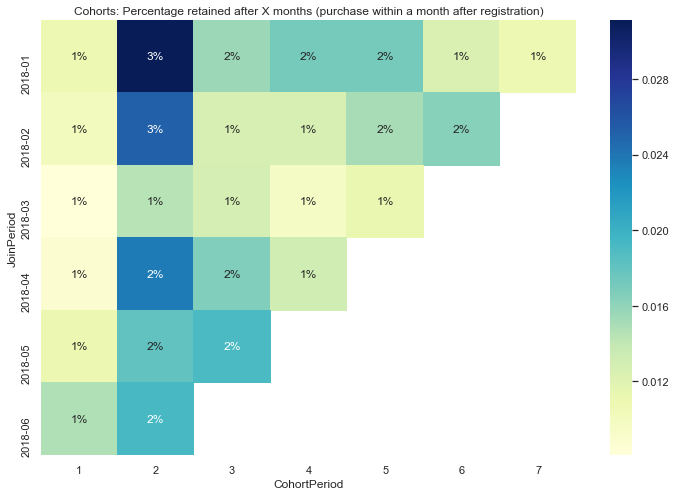

In [323]:

sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: Percentage retained after X months (purchase within a month after registration)')
sns.heatmap(without.iloc[:,1:], mask=without.iloc[:,1:].isnull(), annot=True, fmt='.0%', cmap="YlGnBu", );